In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
stock_data = pd.read_csv('dfnew_clean.csv')
stock_data["FutureOne"]= stock_data.Close.shift(-1)
# stock_data["FutureThree"]= stock_data.Close.shift(-3)
# stock_data["FutureFive"]= stock_data.Close.shift(-5)
stock_data

,DateTime,Volume,Transaction,Open,High,Low,Close,Dir,Change,ForeignBuy,ForeignSell,ForeignNet,TrustBuy,TrustSell,TrustNet,DealerNet,DealerBuy,DealerSell,InvestorsNet,PE-Ratio,PBR,Yield,ForeignVol,TrustVol,DealerVol,InvestorsVol,Pattern,Trend,InvestorsNet_Dir,ForeignNet_Dir,TrustNet_Dir,DealerNet_Dir,Dir2,FutureOne
0,2013-01-02,40647,14353,97.6,99.9,97.1,99.6,+,2.6,22484,8625,13859,1746,147,1599,-350,1300,1650,15108,16.54,3.83,3.01,31109,1893,2950,35952,0,0,1,1,1,0,0,101.0
1,2013-01-03,44335,12616,100.5,102.0,100.0,101.0,+,1.4,32303,17347,14955,926,516,410,-1067,1512,2579,14298,16.78,3.88,2.97,49651,1442,4091,55184,0,0,1,1,1,0,1,101.5
2,2013-01-04,39502,10276,100.5,101.5,100.0,101.5,+,0.5,33581,24337,9244,234,190,44,-246,910,1156,9042,16.86,3.90,2.96,57919,424,2066,60409,0,0,1,1,1,0,1,100.5
3,2013-01-07,42328,9042,101.0,101.0,99.1,100.5,-,1.0,26613,26952,-339,203,925,-722,-450,871,1321,-1511,16.69,3.86,2.99,53565,1128,2192,56885,0,0,0,0,0,0,2,99.7
4,2013-01-08,31218,9463,99.6,100.0,98.9,99.7,-,0.8,16628,15087,1540,209,635,-426,-80,749,829,1034,16.56,3.83,3.01,31715,844,1578,34137,0,0,1,1,0,0,2,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,2022-12-26,9152,16718,454.0,457.0,453.5,456.5,+,1.5,3755,4793,-1037,225,294,-69,-62,406,469,-1168,13.35,4.32,2.41,8548,519,876,9944,5,0,0,0,0,0,1,457.0
2448,2022-12-27,10486,13482,458.0,462.5,457.0,457.0,+,0.5,5166,4411,754,67,6,61,-61,224,286,753,13.36,4.33,2.41,9577,73,510,10161,0,0,1,1,1,0,1,451.0
2449,2022-12-28,34823,59400,451.0,452.0,446.0,451.0,-,6.0,6736,22365,-15629,276,335,-59,-1739,673,2412,-17427,13.19,4.27,2.44,29102,611,3085,32798,0,0,0,0,0,0,2,446.0
2450,2022-12-29,25596,34637,444.0,449.5,442.5,446.0,-,5.0,13201,19100,-5898,134,258,-123,1168,1414,245,-4854,13.04,4.22,2.47,32301,392,1659,34353,0,0,0,0,0,1,2,448.5


In [2]:
stock_data.loc[stock_data.Close >= stock_data.FutureOne, "TrendOne"]= 0
stock_data.loc[stock_data.Close < stock_data.FutureOne, "TrendOne"]= 1
stock_data['TrendOne']=stock_data['TrendOne'].fillna(0).astype(int)

stock_data

,DateTime,Volume,Transaction,Open,High,Low,Close,Dir,Change,ForeignBuy,ForeignSell,ForeignNet,TrustBuy,TrustSell,TrustNet,DealerNet,DealerBuy,DealerSell,InvestorsNet,PE-Ratio,PBR,Yield,ForeignVol,TrustVol,DealerVol,InvestorsVol,Pattern,Trend,InvestorsNet_Dir,ForeignNet_Dir,TrustNet_Dir,DealerNet_Dir,Dir2,FutureOne,TrendOne
0,2013-01-02,40647,14353,97.6,99.9,97.1,99.6,+,2.6,22484,8625,13859,1746,147,1599,-350,1300,1650,15108,16.54,3.83,3.01,31109,1893,2950,35952,0,0,1,1,1,0,0,101.0,1
1,2013-01-03,44335,12616,100.5,102.0,100.0,101.0,+,1.4,32303,17347,14955,926,516,410,-1067,1512,2579,14298,16.78,3.88,2.97,49651,1442,4091,55184,0,0,1,1,1,0,1,101.5,1
2,2013-01-04,39502,10276,100.5,101.5,100.0,101.5,+,0.5,33581,24337,9244,234,190,44,-246,910,1156,9042,16.86,3.90,2.96,57919,424,2066,60409,0,0,1,1,1,0,1,100.5,0
3,2013-01-07,42328,9042,101.0,101.0,99.1,100.5,-,1.0,26613,26952,-339,203,925,-722,-450,871,1321,-1511,16.69,3.86,2.99,53565,1128,2192,56885,0,0,0,0,0,0,2,99.7,0
4,2013-01-08,31218,9463,99.6,100.0,98.9,99.7,-,0.8,16628,15087,1540,209,635,-426,-80,749,829,1034,16.56,3.83,3.01,31715,844,1578,34137,0,0,1,1,0,0,2,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,2022-12-26,9152,16718,454.0,457.0,453.5,456.5,+,1.5,3755,4793,-1037,225,294,-69,-62,406,469,-1168,13.35,4.32,2.41,8548,519,876,9944,5,0,0,0,0,0,1,457.0,1
2448,2022-12-27,10486,13482,458.0,462.5,457.0,457.0,+,0.5,5166,4411,754,67,6,61,-61,224,286,753,13.36,4.33,2.41,9577,73,510,10161,0,0,1,1,1,0,1,451.0,0
2449,2022-12-28,34823,59400,451.0,452.0,446.0,451.0,-,6.0,6736,22365,-15629,276,335,-59,-1739,673,2412,-17427,13.19,4.27,2.44,29102,611,3085,32798,0,0,0,0,0,0,2,446.0,0
2450,2022-12-29,25596,34637,444.0,449.5,442.5,446.0,-,5.0,13201,19100,-5898,134,258,-123,1168,1414,245,-4854,13.04,4.22,2.47,32301,392,1659,34353,0,0,0,0,0,1,2,448.5,1


In [3]:
target = ['TrendOne']
features = ['Pattern', 'InvestorsNet_Dir', 'ForeignNet_Dir','TrustNet_Dir','DealerNet_Dir']

# split the data
split = int(stock_data.shape[0] * 0.8)
df_train = stock_data.iloc[:split, :].copy()
df_test = stock_data.iloc[split:, :].copy()

data=df_train[features+target]
print(data.corr())
dataset_data = df_train[features]
dataset_target2=df_train[target]

testdata=df_test[features]

dataset_data

                   Pattern  InvestorsNet_Dir  ForeignNet_Dir  TrustNet_Dir  \
Pattern           1.000000         -0.019631       -0.013060      0.005045   
InvestorsNet_Dir -0.019631          1.000000        0.918340      0.090583   
ForeignNet_Dir   -0.013060          0.918340        1.000000      0.064726   
TrustNet_Dir      0.005045          0.090583        0.064726      1.000000   
DealerNet_Dir     0.015977         -0.172647       -0.239739     -0.055466   
TrendOne         -0.055880         -0.032271       -0.036128      0.042852   

                  DealerNet_Dir  TrendOne  
Pattern                0.015977 -0.055880  
InvestorsNet_Dir      -0.172647 -0.032271  
ForeignNet_Dir        -0.239739 -0.036128  
TrustNet_Dir          -0.055466  0.042852  
DealerNet_Dir          1.000000  0.056279  
TrendOne               0.056279  1.000000  


,Pattern,InvestorsNet_Dir,ForeignNet_Dir,TrustNet_Dir,DealerNet_Dir
0,0,1,1,1,0
1,0,1,1,1,0
2,0,1,1,1,0
3,0,0,0,0,0
4,0,1,1,0,0
...,...,...,...,...,...
1956,0,1,1,1,1
1957,0,1,1,0,1
1958,0,1,1,1,1
1959,0,1,1,0,0


# Build the model-DNN

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam
from sklearn import preprocessing

In [5]:
def build_model():
#Write the code
    #contruct model
    model = Sequential()
    #stack model
    model.add(Dense(input_dim=5,units=50)) #The number of columns for each data
    model.add(Activation("relu"))
    model.add(Dense(units=100))
    model.add(Activation("relu"))
    model.add(Dense(units=10))
    model.add(Activation("relu"))
    model.add(Dense(units=1))
    model.add(Activation("sigmoid"))
    model.summary()
    return model

def show_train_history(train_history,train,validation,label):
    #Write the code
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(label)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [6]:
#Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures = minmax_scale.fit_transform(dataset_data)

In [7]:
model = build_model()
#Train Model
#Write the code
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])
train_history = model.fit(x=dataset_data,y=dataset_target2,
                          validation_split=0.2,batch_size=50,epochs=32)

#Evaluate training result
#Write the code
score = model.evaluate(x=scaledFeatures, y=dataset_target2)
print ('\nTrain Loss:', score[0])
print ('\nTrain Acc:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                300       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

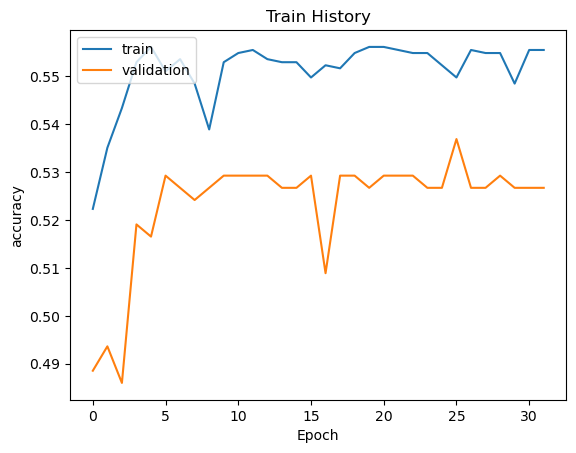

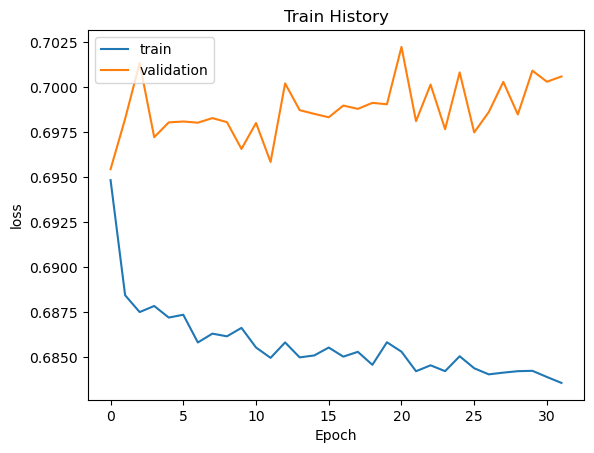

In [8]:
#Show Training Process
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

In [9]:
probability = model.predict(testdata)
probability=probability.flatten().round(0).astype(int)
submission = pd.DataFrame({
    "DateTime": df_test['DateTime'],
    "TrendOne": df_test['TrendOne'],
    "predictedTrend" : probability
    })
expectedans = submission.TrendOne.values


16/16 [==============================] - 0s 716us/step


In [10]:
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
import math

print(metrics.classification_report(expectedans,probability))
print(metrics.confusion_matrix(expectedans, probability))
accuracy = accuracy_score(expectedans, probability)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('precision:',metrics.precision_score(expectedans, probability,average='macro')) 
print('recall:',metrics.recall_score(expectedans, probability,average='macro'))
print('F1-score:',metrics.f1_score(expectedans, probability,average='macro'))

              precision    recall  f1-score   support

           0       0.54      0.44      0.48       274
           1       0.43      0.53      0.48       217

    accuracy                           0.48       491
   macro avg       0.49      0.49      0.48       491
weighted avg       0.49      0.48      0.48       491

[[120 154]
 [101 116]]
Accuracy: 48.07%
precision: 0.4863080274844981
recall: 0.48625920818056445
F1-score: 0.4806172609047352
